In [59]:
import tensorflow as tf
from tensorflow.keras import layers, backend
import pandas as pd
import MLtemplate as ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn.metrics
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt


In [2]:
heartdf = pd.read_csv("heart.csv")
heartdf.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
ml.missing_values(heartdf)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [92]:
heartdf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


M    725
F    193
Name: Sex, dtype: int64




C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


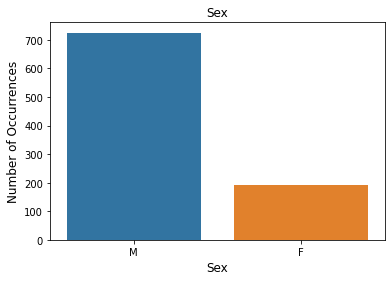

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64




C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


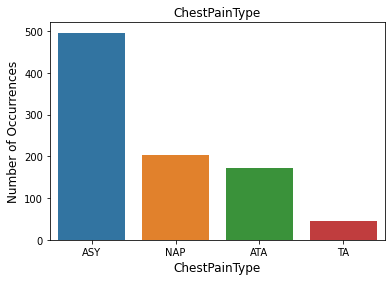

C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64




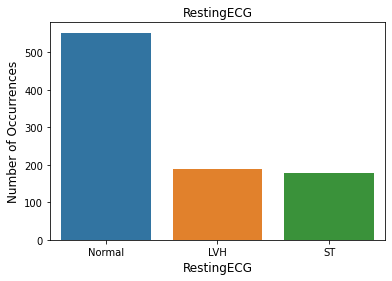

N    547
Y    371
Name: ExerciseAngina, dtype: int64




C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


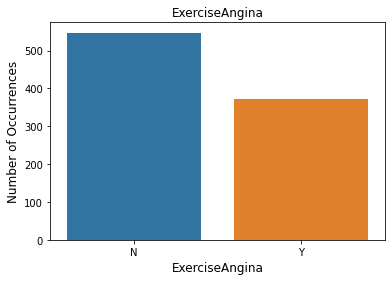

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64




C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


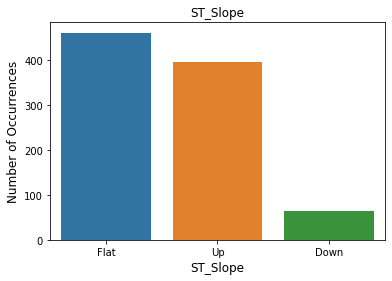

In [7]:
ml.categ_analysis(heartdf, ["Sex" , "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"])

In [11]:
newheartdf = pd.get_dummies(heartdf, drop_first=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(newheartdf, newheartdf["HeartDisease"], test_size=0.20)
X_train, X_test = ml.standard_scale(X_train,X_test)

# Vanilla Autoencoder

In [41]:

input_data = layers.Input(shape=(16,))

encoded = layers.Dense(5, activation='sigmoid')(input_data)
decoded = layers.Dense(16, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_data, decoded)

# encoder = tf.keras.Model(input_data, encoded)

# # # This is our encoded (5-dimensional) input
# encoded_input = tf.keras.Input(shape=(5,))
# # # Retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # # Create the decoder model
# decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))



In [42]:
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [43]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
3/3 [==============================] - 0s 65ms/step - loss: 1.2653 - accuracy: 0.0014 - val_loss: 1.2926 - val_accuracy: 0.0000e+00
Epoch 2/50
3/3 [==============================] - 0s 13ms/step - loss: 1.2624 - accuracy: 0.0014 - val_loss: 1.2897 - val_accuracy: 0.0000e+00
Epoch 3/50
3/3 [==============================] - 0s 18ms/step - loss: 1.2595 - accuracy: 0.0014 - val_loss: 1.2867 - val_accuracy: 0.0000e+00
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 1.2567 - accuracy: 0.0014 - val_loss: 1.2839 - val_accuracy: 0.0000e+00
Epoch 5/50
3/3 [==============================] - 0s 13ms/step - loss: 1.2538 - accuracy: 0.0014 - val_loss: 1.2810 - val_accuracy: 0.0000e+00
Epoch 6/50
3/3 [==============================] - 0s 17ms/step - loss: 1.2510 - accuracy: 0.0014 - val_loss: 1.2781 - val_accuracy: 0.0000e+00
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 1.2482 - accuracy: 0.0014 - val_loss: 1.2753 - val_accuracy: 0.0000e+00

In [49]:
X_train_predict = autoencoder.predict(X_train)
X_test_predict = autoencoder.predict(X_test)


### MSE 

In [51]:
print( "For X_train: " + str(sklearn.metrics.mean_squared_error(X_train,X_train_predict)))
print( "For X_test: " + str(sklearn.metrics.mean_squared_error(X_test,X_test_predict)))

For X_train: 1.1434397269893473
For X_test: 1.1708236669118328


In [57]:
X_train_predict

array([[0.35146356, 0.40383497, 0.5058786 , ..., 0.36062098, 0.28851745,
        0.36418337],
       [0.46091005, 0.40636504, 0.42899808, ..., 0.3853016 , 0.27236834,
        0.36464232],
       [0.40256473, 0.3827113 , 0.44646612, ..., 0.34983128, 0.22547957,
        0.33801746],
       ...,
       [0.36130622, 0.3982346 , 0.43873885, ..., 0.33488834, 0.25876772,
        0.38577595],
       [0.36838603, 0.38666928, 0.5133166 , ..., 0.3441348 , 0.2113449 ,
        0.29574516],
       [0.3507301 , 0.41091293, 0.47601193, ..., 0.34506553, 0.3299627 ,
        0.41683438]], dtype=float32)

In [65]:
def plot_reconstruction_error(trainx, decoded_data):
    plt.plot(trainx[0], 'b')
    plt.plot(decoded_data[0], 'r')
    plt.fill_between(np.arange(16), decoded_data[0], trainx[0], color='lightcoral')
    plt.legend(labels=["Input", "Reconstruction", "Error"])
    plt.show()

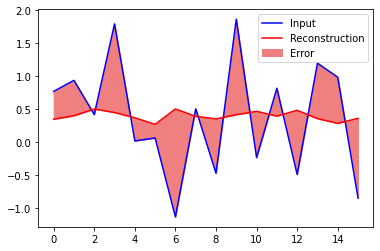

In [66]:
plot_reconstruction_error(X_train, X_train_predict)

from the above chart it seems that reconstriction did not happen properly as errors are too much

### wasserstein distance

In [ ]:
tf.keras.losses.kullback_leibler_divergence(X_train,c)

# Variational Autoencoder

### define sampling

In [70]:
latent_dim = 2
intermediate_dim = 5
original_dim = 16

In [82]:
from tensorflow.keras import backend as K

In [83]:
def sampling(distribution):
    dist_mean, dist_var = distribution
    epsilon = K.random_normal(shape=(K.shape(dist_mean)[0], latent_dim), mean=0., stddev=1)
    return dist_mean + K.exp(dist_var) * epsilon

In [148]:
x = layers.Input(shape=(original_dim,), name="input")
# intermediate layer
h = layers.Dense(intermediate_dim, activation='relu', name="encoding")(x)
# defining the mean of the latent space
dist_mean = layers.Dense(latent_dim, name="mean")(h)
# defining the log variance of the latent space
dist_var = layers.Dense(latent_dim, name="variance")(h)
# note that "output_shape" isn't necessary with the TensorFlow backend
z = layers.Lambda(sampling, output_shape=(latent_dim,))([dist_mean, dist_var])
# defining the encoder as a keras model
encoder2 = tf.keras.Model(x, [dist_mean, dist_var,z], name="encoder")
# print out summary of what we just did

# Input to the decoder
input_decoder = layers.Input(shape=(latent_dim,), name="decoder_input")
# taking the latent space to intermediate dimension
decoder_h = layers.Dense(intermediate_dim, activation='relu', name="decoder_h")(input_decoder)
# getting the mean from the original dimension
x_decoded = layers.Dense(original_dim, activation='sigmoid', name="flat_decoded")(decoder_h)
# defining the decoder as a keras model
decoder2 = tf.keras.Model(input_decoder, x_decoded, name="decoder")


encoded = encoder2(x)[2]

decoded = decoder2(encoded)

autoencoder_vae =  tf.keras.Model(x,decoded)


In [150]:
autoencoder_vae.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 16)]              0         
                                                                 
 encoder (Functional)        [(None, 2),               109       
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 16)                111       
                                                                 
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________


In [151]:
# def total_vae_loss(dist_mean, dist_var):
reconstruction_loss = tf.keras.losses.mse(x, decoded)
reconstruction_loss_batch = reconstruction_loss
reconstruction_loss_batch *= original_dim
kl_loss = 1 + dist_var - K.square(dist_mean) - K.exp(dist_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
kl_loss_batch = kl_loss
total_loss = K.mean(reconstruction_loss_batch + kl_loss_batch)
    # return total_loss


In [152]:
autoencoder_vae.add_loss(total_loss)
# autoencoder_vae.compile( optimizer='adam', metrics=['rsme'])

In [161]:
autoencoder_vae.compile( optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.KLDivergence()])

In [175]:
history = autoencoder_vae.fit(X_train, X_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
12/12 [==============================] - 0s 7ms/step - loss: 16.2351 - root_mean_squared_error: 1.0031 - kullback_leibler_divergence: 11.1791 - val_loss: 16.6184 - val_root_mean_squared_error: 1.0144 - val_kullback_leibler_divergence: 11.1846
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 16.2406 - root_mean_squared_error: 1.0034 - kullback_leibler_divergence: 11.2418 - val_loss: 16.6413 - val_root_mean_squared_error: 1.0149 - val_kullback_leibler_divergence: 11.6666
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 16.1585 - root_mean_squared_error: 1.0011 - kullback_leibler_divergence: 11.5268 - val_loss: 16.6247 - val_root_mean_squared_error: 1.0145 - val_kullback_leibler_divergence: 11.7530
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 16.1518 - root_mean_squared_error: 1.0018 - kullback_leibler_divergence: 11.4179 - val_loss: 16.5894 - val_root_mean_squared_error: 1.0134 - val_kullback_leibler_

Text(0.5, 1.0, 'VAL RSME')

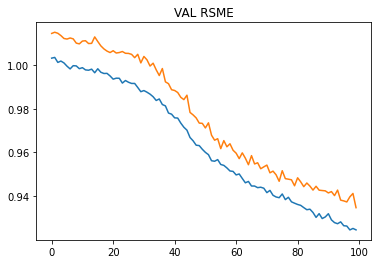

In [176]:
plt.plot(history.history["root_mean_squared_error"])
plt.title("Training RSME")
plt.plot(history.history["val_root_mean_squared_error"])
plt.title("VAL RSME")

Text(0.5, 1.0, 'VAL KL Divergence')

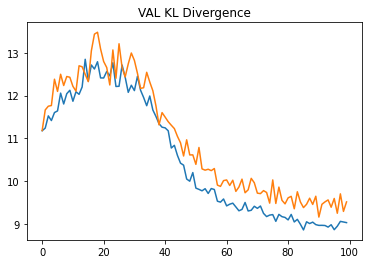

In [177]:
plt.plot(history.history["kullback_leibler_divergence"])
plt.title("Training KL Divergence")
plt.plot(history.history["val_kullback_leibler_divergence"])
plt.title("VAL KL Divergence")

In [178]:
X_train_predict = autoencoder_vae.predict(X_train)
X_test_predict = autoencoder_vae.predict(X_test)

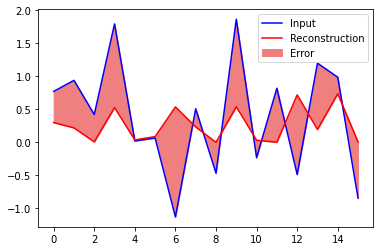

In [179]:
plot_reconstruction_error(X_train, X_train_predict)

# GANS

In [263]:
def generate_latent_space(latent_dim, n_samples):
    x_input = np.random.randn(latent_dim * n_samples)  
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input

def generate_real_samples(X_train, n_samples):
    ix = np.random.randint(0, X_train.shape[0], n_samples) 
    X = X_train[ix]  
    y = np.ones((n_samples, 1)) 
    return X, y

def generate_fake_samples(generator, latent_dim, n_samples):
    print(latent_dim)
    print(n_samples)
    z_input = generate_latent_space(latent_dim, n_samples)
    print(z_input.shape)
    images = generator.predict(z_input)  
    y = np.zeros((n_samples, 1))
    return images, y




In [259]:
np.random.randn((64* 100)).reshape(64,100).shape

(64, 100)

In [272]:
def build_generator(input_shape, z_dim):

    model = tf.keras.models.Sequential()

    model.add(layers.Dense(128, input_dim=z_dim, activation="tanh"))

    # # Leaky ReLU activation
    # model.add(LeakyReLU(alpha=0.01))

    # Output layer with tanh activation
    model.add(layers.Dense(16, activation='tanh'))

    # Reshape the Generator output to image dimensions
    # model.add(Reshape(img_shape))

    return model

In [273]:
def build_discriminator(img_shape):

    model = tf.keras.models.Sequential()

    # Flatten the input image
    # model.add(Flatten(input_shape=img_shape))

    # Fully connected layer
    model.add(layers.Dense(128, activation="tanh"))

    # # Leaky ReLU activation
    # model.add(LeakyReLU(alpha=0.01))

    # Output layer with sigmoid activation
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [274]:
def build_gan(generator, discriminator):

    model = tf.keras.models.Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [275]:

input_shape = 16
z_dim = 100

In [276]:
discriminator = build_discriminator(input_shape)
discriminator.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.KLDivergence(), "accuracy"])

# Build the Generator
generator = build_generator(input_shape, z_dim)

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan_model = build_gan(generator, discriminator)
gan_model.compile(loss='mse', optimizer='adam')

In [266]:
discriminator.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               2176      
                                                                 
 dense_56 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,305
Trainable params: 0
Non-trainable params: 2,305
_________________________________________________________________


In [267]:
generator.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 128)               12928     
                                                                 
 dense_58 (Dense)            (None, 16)                2064      
                                                                 
Total params: 14,992
Trainable params: 14,992
Non-trainable params: 0
_________________________________________________________________


In [268]:
gan_model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_32 (Sequential)  (None, 16)                14992     
                                                                 
 sequential_31 (Sequential)  (None, 1)                 2305      
                                                                 
Total params: 17,297
Trainable params: 14,992
Non-trainable params: 2,305
_________________________________________________________________


In [277]:
losses = []
accuracies = []

def training_model(generative,discriminative, gan_model, X_train, latent_dim, n_epochs, batch_size):
    train_batch = int(X_train.shape[0] / batch_size)
    n_steps = train_batch * n_epochs
    for iter in range(n_steps):
        actual_x, actual_y = generate_real_samples(X_train, batch_size)
        d_loss_r,d_rmse_r, d_kl_r, d_acc_r = discriminative.train_on_batch(actual_x, actual_y)
        fake_x, fake_y = generate_fake_samples(gan_model, latent_dim, batch_size)
        d_loss_f, d_rsme_f, d_kl_f, d_acc_f = discriminative.train_on_batch(fake_x, fake_y)
        z_input = generate_latent_space(latent_dim, batch_size) 
        y_gan = np.ones((batch_size, 1)) 
        g_loss,g_rmse, g_kl, g_acc = gan_model.train_on_batch(z_input, y_gan)
        print("Iteration: " +str(iter+1) + ", " + "Discriminative loss : " + str(d_loss_r) + "," + "Discriminative acc: " + str(d_acc_r))
        # , d_loss_f,d_acc_f, g_loss,g_acc))
        if (iiter+1) % (train_batch * 1) == 0:
            # summarize_performance(iter, g_model, latent_dim)
            losses.append((d_loss_r, g_loss))

In [278]:
training_model(generator,discriminator, gan_model, X_train, z_dim, 100, 64)

100
64
(64, 100)


ValueError: in user code:

    File "C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\BabarBinAsifKhan\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_34" (type Sequential).
    
    Input 0 of layer "dense_59" is incompatible with the layer: expected axis -1of input shape to have value 16, but received input with shape (64, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(64, 1), dtype=float32)
      • training=True
      • mask=None
